In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_circles

In [ ]:
num_samples = 2000
X, y = make_circles(num_samples,
                    noise = 0.02,
                    random_state = 50,
                   factor=0.8)

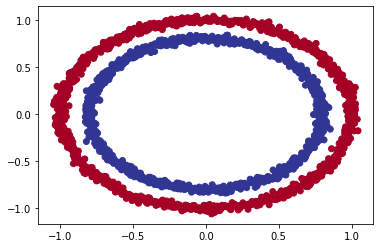

In [ ]:
plt.scatter(X[:,0], X[:,1], c = y, cmap = plt.cm.RdYlBu)

In [ ]:
def plot_decision_boundary(model, X, y):
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
    x_in = np.c_[xx.ravel(), yy.ravel()] 
    y_pred = model.predict(x_in)
    if len(y_pred[0]) > 1:
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    y_pred = np.round(y_pred).reshape(xx.shape)
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())



In [ ]:
tf.random.set_seed(50)

Without activation function (there is no difference between setting activation to linear or none) 

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Dense(10), 
                             tf.keras.layers.Dense(5),
                             tf.keras.layers.Dense(1)])
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics = ['accuracy'])

In [ ]:
h = model.fit(X, y, epochs = 100, verbose=False)

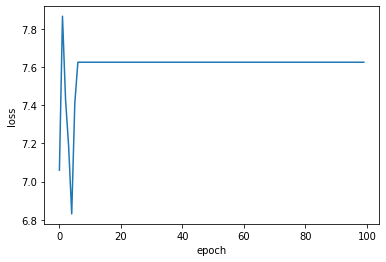

In [ ]:
plt.plot(h.history['loss'])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

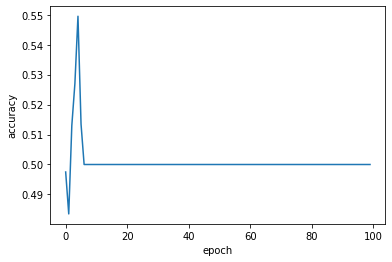

In [ ]:
plt.plot(h.history['accuracy'])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

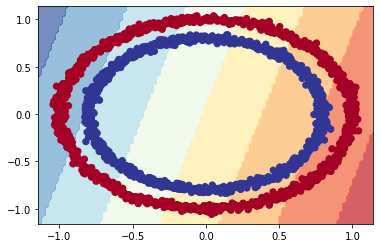

In [ ]:
plot_decision_boundary(model,X,y)

**Acitvation**: The problem with this activation is that it cannot be defined in a specific range. Applying this function in all the nodes makes the activation function work like linear regression. The final layer of the Neural Network will be working as a linear function of the first layer. Another issue is the gradient descent when differentiation is done, it has a constant output which is not good because during backpropagation the rate of change of error is constant which can ruin the output and the logic of backpropagation. As a result, as you can see, there is no progress and fluctuation in training loss and accuracy. 
**Loss function**: the last diagram is a result of using crossentroupy loss without non-linearity in the last layer.It is like out model is making decission randomly.

Using MSE loss function

In [ ]:
model_mse = tf.keras.Sequential([tf.keras.layers.Dense(10), 
                             tf.keras.layers.Dense(5),
                             tf.keras.layers.Dense(1)])
model_mse.compile(loss='mean_squared_error',
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.3),
              metrics = ['accuracy'])

In [ ]:
h = model_mse.fit(X, y, epochs = 100, verbose=False)

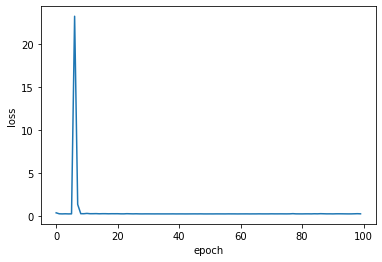

In [ ]:
plt.plot(h.history['loss'])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

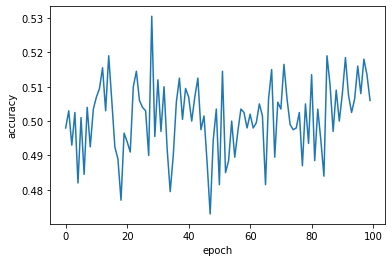

In [ ]:
plt.plot(h.history['accuracy'])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

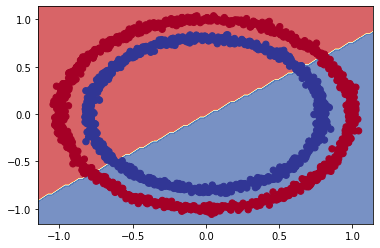

In [ ]:
plot_decision_boundary(model_mse,X,y)

Regression loss functions are not appropriate for this task. Though we have used a multi-layer nueral networks, the model is unable to fit the data properly. 

Using just one layer

In [ ]:
model_one_l = tf.keras.Sequential([tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)])
model_one_l.compile(loss='mean_squared_error',
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.3),
              metrics = ['accuracy'])

In [ ]:
h = model_one_l.fit(X, y, epochs = 100, verbose=False)

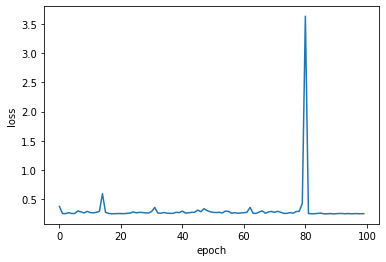

In [ ]:
plt.plot(h.history['loss'])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

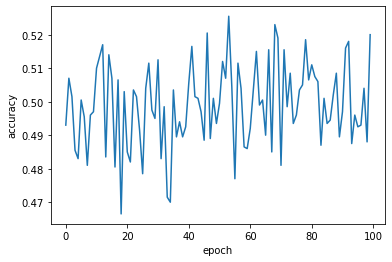

In [ ]:
plt.plot(h.history['accuracy'])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

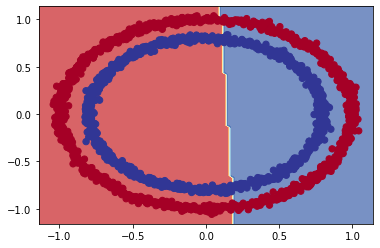

In [ ]:
plot_decision_boundary(model_one_l,X,y)

As we mentioned before, there is no benefit in adding layers while we use a linear function for activation.

With sigmoid activation function and binary_crossentropy

In [ ]:
linear_model = tf.keras.Sequential([tf.keras.layers.Dense(10,activation='sigmoid'), 
                             tf.keras.layers.Dense(5,activation='sigmoid'),
                             tf.keras.layers.Dense(1,activation='sigmoid')])
linear_model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics = ['accuracy'])

In [ ]:
h = linear_model.fit(X, y, epochs = 100, verbose=False)

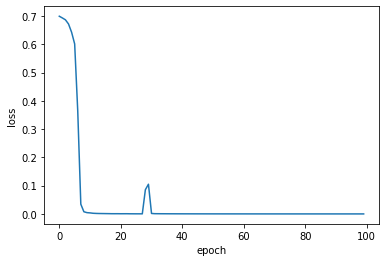

In [ ]:
plt.plot(h.history['loss'])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

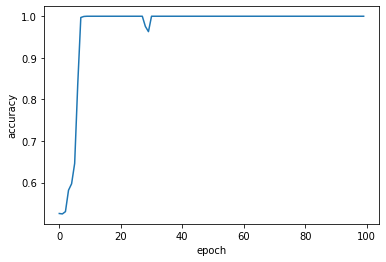

In [ ]:
plt.plot(h.history['accuracy'])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

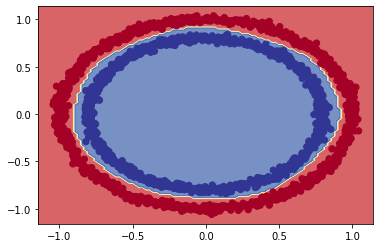

In [ ]:
plot_decision_boundary(linear_model,X,y)

By using non-linearity, as you can see we have progress due to the change of gradients. Also, we have set the learning rate to 0.1 after some trial and error. Setting the learning rate to a high value will lead to fluctuation of loss value and escaping optimal local minima. In contrast, setting this value to a low number will require more time to reach optimal minima. 

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
mnist_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
mnist_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
mnist_model.fit(train_images, train_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5288 - accuracy: 0.5856
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6793 - accuracy: 0.7719
Epoch 3/30
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5083 - accuracy: 0.8194
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4486 - accuracy: 0.8415
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4082 - accuracy: 0.8532
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3932 - accuracy: 0.8607
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3744 - accuracy: 0.8664
Epoch 8/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3596 - accuracy: 0.8712
Epoch 9/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3497 - accuracy: 0.8751
Epoch 10/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.339

In [ ]:
test_loss, test_acc = mnist_model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.4269 - accuracy: 0.8754 - 597ms/epoch - 2ms/step

Test accuracy: 0.8754000067710876


In [ ]:
probability_model = tf.keras.Sequential([mnist_model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

In [ ]:
conf_mat = tf.math.confusion_matrix(test_labels,np.argmax(predictions,axis=1))

In [ ]:
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[846,   3,  13,  13,   3,   2, 117,   0,   3,   0],
       [  5, 968,   2,  13,   5,   0,   6,   0,   1,   0],
       [ 15,   2, 816,   8,  76,   0,  80,   0,   3,   0],
       [ 45,  13,  13, 850,  31,   0,  41,   0,   7,   0],
       [  0,   1, 128,  41, 771,   0,  56,   0,   3,   0],
       [  1,   0,   0,   0,   0, 949,   0,  32,   3,  15],
       [135,   0,  97,  16,  68,   0, 672,   0,  12,   0],
       [  0,   0,   0,   0,   0,   5,   0, 964,   0,  31],
       [  3,   0,   2,  10,   2,   3,  15,   5, 960,   0],
       [  0,   0,   0,   0,   0,   7,   1,  33,   1, 958]], dtype=int32)>

In [ ]:
import pandas as pd
df_cm = pd.DataFrame(np.array(conf_mat), index = class_names,
                  columns = class_names)

In [ ]:
import seaborn as sn

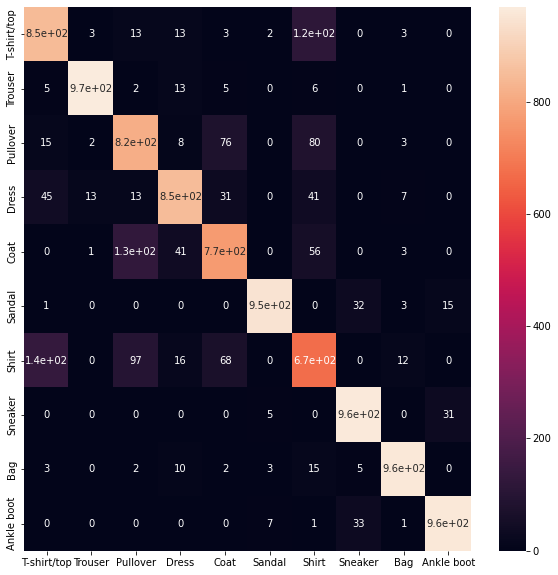

In [ ]:
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True)

Mostly the model cannot differentiate between shirt and t-shirt / top or pullover and coat.